In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
import sklearn.metrics as sm
import matplotlib.pyplot as plt
from sklearn.cluster import Birch,AffinityPropagation, MeanShift, estimate_bandwidth
from sklearn.metrics import silhouette_score
from sklearn.cluster import SpectralClustering
from sklearn.metrics.cluster import homogeneity_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn import svm
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler,LabelEncoder, scale
from sklearn.model_selection import train_test_split
from sklearn import datasets

In [2]:
%matplotlib inline
plt.rcParams['figure.figsize'] = 7, 4

In [3]:
# iris = datasets.load_iris()
# X = scale(iris.data)
# y = pd.DataFrame(iris.target)
# variable_names = iris.feature_names
# X[0:10,]

Build model

In [11]:
def rater(arr2):
    kmeans = KMeans(n_clusters=5,init='k-means++', random_state = 42)
    scaler = StandardScaler()
    scaler.fit(arr2)
    arr2 = scaler.transform(arr2)
    kmeans.fit(arr2)
    y_kmeans = kmeans.predict(arr2)
    ss = silhouette_score(arr2, y_kmeans)
    print(f"\n\n{ss}\n")
    print((y_kmeans))
    centers = kmeans.cluster_centers_
    ordrd = [i[0]+i[1] for i in centers]
    unordrd = ordrd.copy()
    ordrd.sort()
    sortd = {unordrd[i]:ordrd.index(unordrd[i]) for i in range(len(ordrd))}
    indxs = []
    for k in range(len(centers)):
        indxs.append(sortd[centers[k][0]+centers[k][1]])
    for f in range(len(y_kmeans)):
        if(y_kmeans[f] == 0):
            y_kmeans[f] = indxs[0]
        elif y_kmeans[f] == 1:
            y_kmeans[f] = indxs[1]
        elif y_kmeans[f] == 2:
            y_kmeans[f] = indxs[2]
        elif y_kmeans[f] == 3:
            y_kmeans[f] = indxs[3]
        elif y_kmeans[f] == 4:
            y_kmeans[f] = indxs[4]

    # print(indxs)
    # print(sortd)
    # print(centers)
    # print(y_kmeans)
    #print("mean" + str(np.mean(arr2)) + " and variance" + str(np.var(arr2)))
    for i in centers:
        print(i)
        print((i[0]+ i[1]))
#     plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);
#     plt.scatter(arr2[:,0],arr2[:,1], c=kmeans.labels_.astype(float), cmap='rainbow')
#     plt.xlabel("HOSP_R")
#     plt.ylabel("INSTABILITY_2016")
    return y_kmeans

Plotting

In [12]:
# iris_df = pd.DataFrame(iris.data)
# iris_df.columns=['Sepal Length','Sepal Width','Petal Length', 'Petal Width']
# y.columns = ['Target']

In [13]:
# color_theme = np.array(['darkgray','lightsalmon','powderblue'])
# plt.subplot(1,2,1)
# plt.scatter(x='Petal Length',y='Petal Width',data=iris_df,c=color_theme[iris.target],s=50)
# plt.subplot(1,2,2)
# plt.scatter(x='Petal Length',y='Petal Width',data=iris_df,c=color_theme[clustering.labels],s=50)

In [14]:
# list(iris.feature_names)

In [15]:
# iris_df.head()

In [16]:
# iris.info()

In [21]:
marg = pd.read_csv('ONT-ALL.csv')
lss = []
# marg.dropna(subset=["Hospitalization_Rate"], inplace=True)
ids = marg['CASE_R'].values.tolist()
# ids = np.asarray(ids)
# scaler = StandardScaler()
# ids = scaler.fit_transform(ids.reshape(-1, 1))
# for i in ids:
#     lss.extend(list(i))
# print(lss)
pops = marg['INSTABILITY_2016'].values.tolist()
arr2 = np.dstack((ids,pops))

hosr = marg['HOSP_R'].values.tolist()
ar3 = np.dstack((hosr,pops))[0]
scaler = StandardScaler()
scaler.fit(ar3)
ar3 = scaler.transform(ar3)
marg['HOSP_STD'] = ar3

dthr = marg['DEATH_R'].values.tolist()
ar4 = np.dstack((dthr,pops))[0]
scaler = StandardScaler()
scaler.fit(ar4)
ar4 = scaler.transform(ar4)
marg['DEATH_STD'] = ar4


arr = np.dstack((ids,pops))[0]
scaler = StandardScaler()
scaler.fit(arr)
arr = scaler.transform(arr)
marg['CASE_STD'] = arr

marg.to_csv('MODDED.csv',index=False)
print(marg)
print(arr)
print(arr2[0])
marg.head(50)
#plt.scatter(marg['Hospitalization_Rate'],marg['ethniccon_PHUUID'])

                                                  PHU  PHUUID  POP_2016  \
0                                Algoma Public Health    3526    113085   
1                            Brant County Health Unit    3527    134940   
2                   Durham Regional Health Department    3530    645865   
3                        Elgin-St. Thomas Health Unit    3531     88975   
4                              Grey Bruce Health Unit    3533    161975   
5                       Haldimand-Norfolk Health Unit    3534    109655   
6   Haliburton, Kawartha, Pine Ridge District Heal...    3535    179080   
7                         Halton Regional Health Unit    3536    548430   
8             City of Hamilton Public Health Services    3537    536920   
9                Hastings Prince Edward Public Health    3538    161180   
10                           Huron County Health Unit    3539     59300   
11                         Chatham-Kent Public Health    3540    102045   
12  Kingston, Frontenac a

,PHU,PHUUID,POP_2016,POPD_2016,POP_2020,POPD_2020,POP65_2016,POPR65_2016,CASE_C,CASE_R,...,ETHNIC-CONC_2016,LIM-AT_2016,HHSIZE_2016,CASE-RTNG,DEATH-RTNG,HOSP-RTNG,AVG-ALL,CASE_STD,HOSP_STD,DEATH_STD
0,Algoma Public Health,3526,113085,2.7,114434,2.7,26765,23.7,26,22.7,...,-0.763325,16.3,2.2,2.38,2.62,2.38,2.46,-0.986892,-1.096970,-0.937106
1,Brant County Health Unit,3527,134940,119.5,155203,137.4,23685,17.6,146,94.1,...,-0.461676,13.3,2.5,1.88,1.62,1.75,1.75,-0.381935,-0.260741,-0.625728
2,Durham Regional Health Department,3530,645865,255.9,712402,282.3,92790,14.4,"1,764",247.6,...,0.132684,9.7,2.8,2.62,3.25,2.38,2.75,0.918639,0.903011,1.534454
3,Elgin-St. Thomas Health Unit,3531,88975,47.3,211498,54.0,16145,18.1,86,40.7,...,-0.605889,14.3,2.5,1.75,1.75,1.62,1.71,-0.834382,-0.602201,-0.703573
4,Grey Bruce Health Unit,3533,161975,18.8,169884,19.7,38705,23.9,108,63.6,...,-0.867702,14.6,2.3,1.75,2.00,1.88,1.88,-0.640355,-0.957599,-0.937106
5,Haldimand-Norfolk Health Unit,3534,109655,38.4,114081,39.9,22665,20.7,432,378.7,...,-0.771863,11.7,2.5,4.12,4.00,3.12,3.75,2.029423,0.491865,2.215592
6,"Haliburton, Kawartha, Pine Ridge District Heal...",3535,179080,19.8,188937,20.9,47265,26.4,207,109.6,...,-0.853605,12.8,2.3,1.88,2.25,1.75,1.96,-0.250606,-0.644013,0.094332
7,Halton Regional Health Unit,3536,548430,568.9,619087,642.2,81810,14.9,801,129.4,...,0.311230,8.2,2.8,1.75,1.50,2.12,1.79,-0.082845,-0.044715,-0.547884
8,City of Hamilton Public Health Services,3537,536920,480.6,592163,530.0,92910,17.3,860,145.2,...,-0.009839,15.3,2.5,2.50,2025.00,2.75,2.50,0.051025,0.512771,-0.217045
9,Hastings Prince Edward Public Health,3538,161180,22.5,168493,23.5,36410,22.6,44,26.1,...,-0.744265,15.9,2.3,2.38,2.38,2.38,2.38,-0.958085,-0.908819,-0.645190




0.41290519665698316

[0 4 2 4 4 2 4 4 1 0 4 1 0 1 1 0 1 0 4 1 4 2 4 0 0 4 4 4 0 0 0 1 4 2 2 3]
[-0.71406844  0.68811324]
-0.025955199881917967
[0.42794345 0.35904656]
0.7869900147113134
[ 1.71559061 -1.20455615]
0.5110344597767473
[2.55897275 3.50582007]
6.064792819400992
[-0.53783428 -0.52903828]
-1.0668725555726724
[1 0 2 0 0 2 0 0 3 1 0 3 1 3 3 1 3 1 0 3 0 2 0 1 1 0 0 0 1 1 1 3 0 2 2 4]


0.42686163581899406

[3 3 4 3 1 0 1 2 3 3 1 3 1 4 4 1 4 3 1 2 1 0 1 1 3 1 1 1 1 3 3 4 2 0 2 0]
[2.30288248 0.37661445]
2.6794969256361147
[-0.63624906 -0.2025076 ]
-0.8387566618058457
[ 0.42043898 -1.93783923]
-1.5174002480395754
[-0.57519931  1.10088734]
0.5256880286352351
[ 0.62598901 -0.42627509]
0.19971392134749727
[3 3 2 3 1 4 1 0 3 3 1 3 1 2 2 1 2 3 1 0 1 4 1 1 3 1 1 1 1 3 3 2 0 4 0 4]


0.5150565136245612

[3 2 1 2 3 4 3 1 2 3 3 0 2 0 0 2 0 3 2 1 2 4 2 3 2 3 2 2 2 2 3 1 1 4 1 4]
[0.4047643  0.76928807]
1.1740523767038296
[ 0.55868677 -1.43990891]
-0.8812221449342296
[-0.5599939  -0.2044604

Text(0, 0.5, 'INSTABILITY_2016')

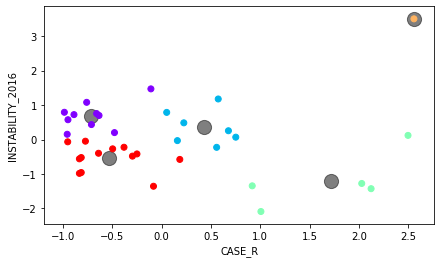

In [22]:
arr2 = arr2[0]
instarates = rater(arr2)
print(instarates)
ids = marg['CASE_R'].values.tolist()
pops = marg['DEPRIVATION_2016'].values.tolist()
arr3 = np.dstack((ids,pops))
arr3 = arr3[0]
deprates = rater(arr3)
print(deprates)
ids = marg['CASE_R'].values.tolist()
pops = marg['DEPENDENCY_2016'].values.tolist()
arr4 = np.dstack((ids,pops))
arr4 = arr4[0]
depandrates = rater(arr4)
print(depandrates)
ids = marg['CASE_R'].values.tolist()
pops = marg['ETHNIC-CONC_2016'].values.tolist()
arr5 = np.dstack((ids,pops))
arr5 = arr5[0]
ethrate = rater(arr5)
print(ethrate)
ids = marg['CASE_R'].values.tolist()
pops = marg['LIM-AT_2016'].values.tolist()
arr6 = np.dstack((ids,pops))
arr6 = arr6[0]
lim16 = rater(arr6)
print(lim16)
ids = marg['CASE_R'].values.tolist()
pops = marg['HHSIZE_2016'].values.tolist()
arr7 = np.dstack((ids,pops))
arr7 = arr7[0]
hh16 = rater(arr7)
print(hh16)
ids = marg['CASE_R'].values.tolist()
pops = marg['POPD_2020'].values.tolist()
arr8 = np.dstack((ids,pops))
arr8 = arr8[0]
popd20 = rater(arr8)
print(popd20)
ids = marg['CASE_R'].values.tolist()
pops = marg['POPR65_2016'].values.tolist()
arr9 = np.dstack((ids,pops))
arr9 = arr9[0]
popr65 = rater(arr9)
print(popr65)
av = [((instarates[i]+deprates[i]+depandrates[i]+ethrate[i]+lim16[i]+hh16[i]+popd20[i]+popr65[i])/8)+1 for i in range(len(ethrate))]
print(av)


kmeans = KMeans(n_clusters=5,init='k-means++', random_state = 42)
scaler = StandardScaler()
scaler.fit(arr2)
arr2 = scaler.transform(arr2)
kmeans.fit(arr2)
y_kmeans = kmeans.predict(arr2)
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);
plt.scatter(arr2[:,0],arr2[:,1], c=kmeans.labels_.astype(float), cmap='rainbow')
plt.xlabel("CASE_R")
plt.ylabel("INSTABILITY_2016")
# kmeans = KMeans(n_clusters=5,init='k-means++', random_state = 42)
# scaler = StandardScaler()
# scaler.fit(arr2)
# arr2 = scaler.transform(arr2)
# kmeans.fit(arr2)
# y_kmeans = kmeans.predict(arr2)
# ss = silhouette_score(arr2, y_kmeans)
# print(f"\n\n{ss}\n")
# print((y_kmeans))
# centers = kmeans.cluster_centers_
# ordrd = [i[0]/i[1] for i in centers]
# unordrd = ordrd.copy()
# ordrd.sort()
# sortd = {unordrd[i]:ordrd.index(unordrd[i]) for i in range(len(ordrd))}
# indxs = []
# for k in range(len(centers)):
#     indxs.append(sortd[centers[k][0]/centers[k][1]])
# for f in range(len(y_kmeans)):
#     if(y_kmeans[f] == 0):
#         y_kmeans[f] = indxs[0]
#     elif y_kmeans[f] == 1:
#         y_kmeans[f] = indxs[1]
#     elif y_kmeans[f] == 2:
#         y_kmeans[f] = indxs[2]
#     elif y_kmeans[f] == 3:
#         y_kmeans[f] = indxs[3]
#     elif y_kmeans[f] == 4:
#         y_kmeans[f] = indxs[4]
        
# # print(indxs)
# # print(sortd)
# # print(centers)
# # print(y_kmeans)
# #print("mean" + str(np.mean(arr2)) + " and variance" + str(np.var(arr2)))
# for i in centers:
#     print(i)
#     print((i[0]+ i[1]))
# plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);
# plt.scatter(arr2[:,0],arr2[:,1], c=kmeans.labels_.astype(float), cmap='rainbow')
# plt.xlabel("HOSP_R")
# plt.ylabel("INSTABILITY_2016")
# print(arr2)

In [23]:
k=0
for i in marg['PHU']:
    print(f"{i} rating: {av[k]:.2f}")
    k+=1


Algoma Public Health rating: 2.38
Brant County Health Unit rating: 1.88
Durham Regional Health Department rating: 2.62
Elgin-St. Thomas Health Unit rating: 1.75
Grey Bruce Health Unit rating: 1.75
Haldimand-Norfolk Health Unit rating: 4.12
Haliburton, Kawartha, Pine Ridge District Health Unit  rating: 1.88
Halton Regional Health Unit rating: 1.75
City of Hamilton Public Health Services rating: 2.50
Hastings Prince Edward Public Health rating: 2.38
Huron County Health Unit rating: 1.75
Chatham-Kent Public Health rating: 3.25
Kingston, Frontenac and Lennox & Addington Public Health rating: 1.50
Lambton Public Health rating: 3.12
Leeds, Grenville and Lanark Disrict Health Unit rating: 3.12
Middlesex-London Health Unit rating: 2.25
Niagara Region Public Health rating: 2.88
North Bay Parry Sound District Health Unit rating: 2.38
Northwestern Health Unit rating: 1.38
Ottawa Public Health rating: 2.38
Oxford County Public Health & Emergency Services rating: 1.38
Peel Public Health rating: 4.3

In [24]:
ids = marg['DEATH_R'].values.tolist()
pops = marg['INSTABILITY_2016'].values.tolist()
arr2 = np.dstack((ids,pops))
arr2 = arr2[0]
instarates = rater(arr2)
print(instarates)
ids = marg['DEATH_R'].values.tolist()
pops = marg['DEPRIVATION_2016'].values.tolist()
arr3 = np.dstack((ids,pops))
arr3 = arr3[0]
deprates = rater(arr3)
print(deprates)
ids = marg['DEATH_R'].values.tolist()
pops = marg['DEPENDENCY_2016'].values.tolist()
arr4 = np.dstack((ids,pops))
arr4 = arr4[0]
depandrates = rater(arr4)
print(depandrates)
ids = marg['DEATH_R'].values.tolist()
pops = marg['ETHNIC-CONC_2016'].values.tolist()
arr5 = np.dstack((ids,pops))
arr5 = arr5[0]
ethrate = rater(arr5)
print(ethrate)
ids = marg['DEATH_R'].values.tolist()
pops = marg['LIM-AT_2016'].values.tolist()
arr6 = np.dstack((ids,pops))
arr6 = arr6[0]
lim16 = rater(arr6)
print(lim16)
ids = marg['DEATH_R'].values.tolist()
pops = marg['HHSIZE_2016'].values.tolist()
arr7 = np.dstack((ids,pops))
arr7 = arr7[0]
hh16 = rater(arr7)
print(hh16)
ids = marg['DEATH_R'].values.tolist()
pops = marg['POPD_2020'].values.tolist()
arr8 = np.dstack((ids,pops))
arr8 = arr8[0]
popd20 = rater(arr8)
print(popd20)
ids = marg['DEATH_R'].values.tolist()
pops = marg['POPR65_2016'].values.tolist()
arr9 = np.dstack((ids,pops))
arr9 = arr9[0]
popr65 = rater(arr9)
print(popr65)
avdeath = [((instarates[i]+deprates[i]+depandrates[i]+ethrate[i]+lim16[i]+hh16[i]+popd20[i]+popr65[i])/8)+1 for i in range(len(ethrate))]
print(avdeath)




0.4543766230591383

[0 2 1 2 2 1 2 2 0 2 2 2 0 3 3 0 3 0 2 3 2 1 2 0 2 2 2 2 0 0 0 3 2 3 1 4]
[-0.6938423   0.81282049]
0.11897819392921039
[ 1.43714823 -1.5355839 ]
-0.09843566589318908
[-0.5290311  -0.40974274]
-0.9387738432383386
[1.07711787 0.31283582]
1.38995368637917
[2.49777822 3.50582007]
6.003598291748261
[2 0 1 0 0 1 0 0 2 0 0 0 2 3 3 2 3 2 0 3 0 1 0 2 0 0 0 0 2 2 2 3 0 3 1 4]


0.3781362952104684

[2 2 1 2 0 4 0 3 2 2 0 2 0 1 4 0 0 2 2 1 0 1 0 0 2 0 0 0 0 2 2 1 1 2 1 4]
[-0.49099775 -0.22005783]
-0.7110555824763174
[ 1.02151472 -1.01966455]
0.0018501753036095359
[-0.57626482  1.02341732]
0.44715250571178666
[-0.54788404 -2.85216045]
-3.400044494417863
[2.23180984 0.18985208]
2.42166192364776
[3 3 2 3 1 4 1 0 3 3 1 3 1 2 4 1 1 3 3 2 1 2 1 1 3 1 1 1 1 3 3 2 2 3 2 4]


0.3988423675967836

[2 0 3 4 2 1 2 0 0 2 2 2 4 1 1 0 1 2 4 3 4 3 0 2 0 4 4 0 4 4 2 3 0 1 3 3]
[-0.2535349  -0.72840306]
-0.9819379549124225
[1.23280667 0.54571148]
1.778518147003211
[-0.71762809  1.21206159]
0.

In [25]:
k=0
for i in marg['PHU']:
    print(f"{i} rating: {avdeath[k]:.2f}")
    k+=1

Algoma Public Health rating: 2.62
Brant County Health Unit rating: 1.62
Durham Regional Health Department rating: 3.25
Elgin-St. Thomas Health Unit rating: 1.75
Grey Bruce Health Unit rating: 2.00
Haldimand-Norfolk Health Unit rating: 4.00
Haliburton, Kawartha, Pine Ridge District Health Unit  rating: 2.25
Halton Regional Health Unit rating: 1.50
City of Hamilton Public Health Services rating: 2.25
Hastings Prince Edward Public Health rating: 2.38
Huron County Health Unit rating: 2.12
Chatham-Kent Public Health rating: 2.38
Kingston, Frontenac and Lennox & Addington Public Health rating: 1.62
Lambton Public Health rating: 3.75
Leeds, Grenville and Lanark Disrict Health Unit rating: 4.25
Middlesex-London Health Unit rating: 2.12
Niagara Region Public Health rating: 2.88
North Bay Parry Sound District Health Unit rating: 2.62
Northwestern Health Unit rating: 1.62
Ottawa Public Health rating: 3.62
Oxford County Public Health & Emergency Services rating: 1.38
Peel Public Health rating: 3.5

In [26]:
ids = marg['HOSP_R'].values.tolist()
pops = marg['INSTABILITY_2016'].values.tolist()
arr2 = np.dstack((ids,pops))
arr2 = arr2[0]
instarates = rater(arr2)
print(instarates)
ids = marg['HOSP_R'].values.tolist()
pops = marg['DEPRIVATION_2016'].values.tolist()
arr3 = np.dstack((ids,pops))
arr3 = arr3[0]
deprates = rater(arr3)
print(deprates)
ids = marg['HOSP_R'].values.tolist()
pops = marg['DEPENDENCY_2016'].values.tolist()
arr4 = np.dstack((ids,pops))
arr4 = arr4[0]
depandrates = rater(arr4)
print(depandrates)
ids = marg['HOSP_R'].values.tolist()
pops = marg['ETHNIC-CONC_2016'].values.tolist()
arr5 = np.dstack((ids,pops))
arr5 = arr5[0]
ethrate = rater(arr5)
print(ethrate)
ids = marg['HOSP_R'].values.tolist()
pops = marg['LIM-AT_2016'].values.tolist()
arr6 = np.dstack((ids,pops))
arr6 = arr6[0]
lim16 = rater(arr6)
print(lim16)
ids = marg['HOSP_R'].values.tolist()
pops = marg['HHSIZE_2016'].values.tolist()
arr7 = np.dstack((ids,pops))
arr7 = arr7[0]
hh16 = rater(arr7)
print(hh16)
ids = marg['HOSP_R'].values.tolist()
pops = marg['POPD_2020'].values.tolist()
arr8 = np.dstack((ids,pops))
arr8 = arr8[0]
popd20 = rater(arr8)
print(popd20)
ids = marg['HOSP_R'].values.tolist()
pops = marg['POPR65_2016'].values.tolist()
arr9 = np.dstack((ids,pops))
arr9 = arr9[0]
popr65 = rater(arr9)
print(popr65)
avhosp = [((instarates[i]+deprates[i]+depandrates[i]+ethrate[i]+lim16[i]+hh16[i]+popd20[i]+popr65[i])/8)+1 for i in range(len(ethrate))]
print(avhosp)




0.43428034674056637

[0 2 4 2 2 4 2 4 1 0 2 2 0 1 1 1 1 0 2 1 2 4 2 0 1 2 2 2 0 0 0 1 2 1 4 3]
[-0.77380235  0.65114391]
-0.12265844046393892
[0.93707997 0.48185774]
1.4189377069342304
[-0.68207176 -0.42704992]
-1.109121681581084
[2.9378357  3.50582007]
6.443655778331725
[ 0.73715925 -1.5000084 ]
-0.7628491512948383
[2 0 1 0 0 1 0 1 3 2 0 0 2 3 3 3 3 2 0 3 0 1 0 2 3 0 0 0 2 2 2 3 0 3 1 4]


0.41049481192869125

[3 3 2 3 0 2 0 4 2 3 0 3 0 1 2 2 2 3 0 4 0 1 0 0 3 0 0 0 0 3 3 2 4 1 4 1]
[-0.83158346 -0.21871399]
-1.050297449634588
[2.02843647 0.27668904]
2.3051255091817664
[ 0.72481491 -0.12746584]
0.5973490709243385
[-0.51315823  1.12904772]
0.615889494941575
[ 0.35249383 -1.93783923]
-1.5853453980141385
[3 3 2 3 1 2 1 0 2 3 1 3 1 4 2 2 2 3 1 0 1 4 1 1 3 1 1 1 1 3 3 2 0 4 0 4]


0.4453197709903024

[2 0 4 0 2 1 2 4 4 2 2 2 0 1 1 4 1 2 0 4 0 3 0 2 1 2 0 0 0 0 2 3 4 1 4 3]
[-0.70463923 -0.13237995]
-0.8370191794269655
[1.01102431 0.4225806 ]
1.4336049029039097
[-0.81474273  1.14596072]
0

In [27]:
k=0
for i in marg['PHU']:
    print(f"{i} rating: {avhosp[k]:.2f}")
    k+=1

Algoma Public Health rating: 2.38
Brant County Health Unit rating: 1.75
Durham Regional Health Department rating: 2.38
Elgin-St. Thomas Health Unit rating: 1.62
Grey Bruce Health Unit rating: 1.88
Haldimand-Norfolk Health Unit rating: 3.12
Haliburton, Kawartha, Pine Ridge District Health Unit  rating: 1.75
Halton Regional Health Unit rating: 2.12
City of Hamilton Public Health Services rating: 2.75
Hastings Prince Edward Public Health rating: 2.38
Huron County Health Unit rating: 1.75
Chatham-Kent Public Health rating: 2.12
Kingston, Frontenac and Lennox & Addington Public Health rating: 1.50
Lambton Public Health rating: 4.12
Leeds, Grenville and Lanark Disrict Health Unit rating: 3.38
Middlesex-London Health Unit rating: 2.62
Niagara Region Public Health rating: 3.38
North Bay Parry Sound District Health Unit rating: 2.38
Northwestern Health Unit rating: 1.25
Ottawa Public Health rating: 2.50
Oxford County Public Health & Emergency Services rating: 1.25
Peel Public Health rating: 4.1

In [28]:
avgall = [(avhosp[i]+avdeath[i]+av[i])/3 for i in range(len(avhosp))]
k=0
for i in marg['PHU']:
    print(f"{i} rating: {avgall[k]:.2f}")
    k+=1

Algoma Public Health rating: 2.46
Brant County Health Unit rating: 1.75
Durham Regional Health Department rating: 2.75
Elgin-St. Thomas Health Unit rating: 1.71
Grey Bruce Health Unit rating: 1.88
Haldimand-Norfolk Health Unit rating: 3.75
Haliburton, Kawartha, Pine Ridge District Health Unit  rating: 1.96
Halton Regional Health Unit rating: 1.79
City of Hamilton Public Health Services rating: 2.50
Hastings Prince Edward Public Health rating: 2.38
Huron County Health Unit rating: 1.88
Chatham-Kent Public Health rating: 2.58
Kingston, Frontenac and Lennox & Addington Public Health rating: 1.54
Lambton Public Health rating: 3.67
Leeds, Grenville and Lanark Disrict Health Unit rating: 3.58
Middlesex-London Health Unit rating: 2.33
Niagara Region Public Health rating: 3.04
North Bay Parry Sound District Health Unit rating: 2.46
Northwestern Health Unit rating: 1.42
Ottawa Public Health rating: 2.83
Oxford County Public Health & Emergency Services rating: 1.33
Peel Public Health rating: 4.0

In [29]:
# ids = marg['Hospitalization_Rate'].values.tolist()
# pops = marg['ethniccon_PHUUID'].values.tolist()
# arr = np.dstack((ids,pops))
# arr2 = arr[0]
# arr2
# kmeans = KMeans(n_clusters=3)
# kmeans.fit(arr2)
# print(kmeans.cluster_centers_)
# plt.scatter(arr2[:,0],arr2[:,1], c=kmeans.labels_, cmap='rainbow')

In [30]:
# cols = ['hrname_english','PHUUID','dependency_PHUUID','pop2016']
# # marg['dependency_PHUUID'].dropna()
# # marg['deprivation_PHUUID'].dropna()
# # marg['ethniccon_PHUUID'].dropna()
# # marg['instability_PHUUID'].dropna()
# X=marg['deprivation_PHUUID'].drop([7]).values.reshape(-1,1)
# y=marg['dependency_PHUUID'].drop([7]).values.reshape(-1,1)
# X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=42)
# svclassifier = SVC(kernel='linear')
# # svclassifier.fit(X_train, y_train)
# regressor = LinearRegression()  
# regressor.fit(X_train, y_train) #training the algorithm

In [ ]:
# y_pred = regressor.predict(X_test)
# df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
# df

In [ ]:
# df1 = df.head(25)
# df1.plot(kind='bar',figsize=(16,10))
# plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
# plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
# plt.show()

In [ ]:
# plt.scatter(X_test, y_test,  color='gray')
# plt.scatter(X, y,  color='gray')
# plt.plot(X_test, y_pred, color='red', linewidth=2)
# plt.show()